https://machinebox.io/docs/tagbox/recognizing-images

Have an attribute for every identified tag. Allow configurable tags which are always an attribute but have confidence = 0.0 if not detected, allowing a [template binary sensor](https://www.home-assistant.io/components/binary_sensor.template/). 

In [6]:
import requests
import operator
import os
import io
import base64
import pathlib
import time
from PIL import Image
import json
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
print(sys.version)

ENDPOINT = "localhost:8080"
URL_CHECK = "http://{}/tagbox/check".format(ENDPOINT)
IMG_FILE = "waffle.jpg"
FIG_SIZE = (12, 8)
ROUNDING_DECIMALS = 3

def print_json(json_data):
    PrettyPrinter().pprint(json_data)

3.6.3 |Anaconda custom (64-bit)| (default, Nov  3 2017, 12:34:11) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


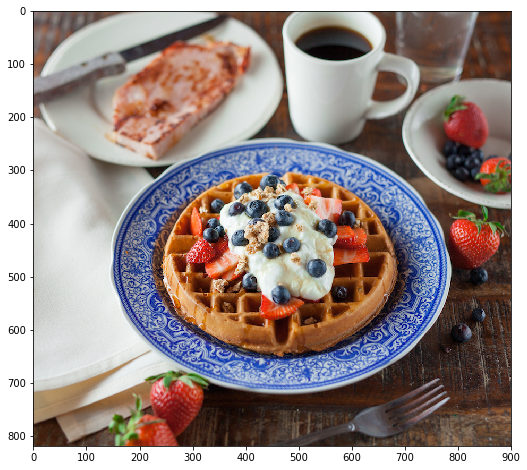

In [2]:
img = plt.imread(IMG_FILE)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

## Post the file

In [3]:
%%time
files = {
    'file': (IMG_FILE, open(IMG_FILE, 'rb')),
}

response = requests.post(URL_CHECK, files=files).json()

CPU times: user 8.77 ms, sys: 5.83 ms, total: 14.6 ms
Wall time: 1.37 s


In [4]:
print_json(response)

{'custom_tags': [],
 'success': True,
 'tags': [{'confidence': 0.9323090314865112, 'tag': 'Food'},
          {'confidence': 0.9119579792022705, 'tag': 'Dish'},
          {'confidence': 0.9054304957389832, 'tag': 'Meal'},
          {'confidence': 0.7076804637908936, 'tag': 'Breakfast'},
          {'confidence': 0.6256734728813171, 'tag': 'Cuisine'},
          {'confidence': 0.5702366828918457, 'tag': 'Produce'},
          {'confidence': 0.39323535561561584, 'tag': 'Lunch'}]}


In [5]:
response['success']

True

In [6]:
response['tags']

[{'confidence': 0.9323090314865112, 'tag': 'Food'},
 {'confidence': 0.9119579792022705, 'tag': 'Dish'},
 {'confidence': 0.9054304957389832, 'tag': 'Meal'},
 {'confidence': 0.7076804637908936, 'tag': 'Breakfast'},
 {'confidence': 0.6256734728813171, 'tag': 'Cuisine'},
 {'confidence': 0.5702366828918457, 'tag': 'Produce'},
 {'confidence': 0.39323535561561584, 'tag': 'Lunch'}]

In [7]:
response['tags'][0]['tag'] # The most likely tag

'Food'

In [28]:
tags = {tag['tag']:round(tag['confidence'], ROUNDING_DECIMALS) for tag in response['tags']}
tags

{'Automotive exterior': 0.506, 'Iron': 0.47, 'Wheel': 0.615}

In [29]:
if response['custom_tags']:
    custom_tags = {tag['tag']:round(tag['confidence'], ROUNDING_DECIMALS) for tag in response['custom_tags']}
    tags.update(custom_tags)

In [30]:
tags

{'Automotive exterior': 0.506, 'Iron': 0.47, 'Wheel': 0.615, 'kettle': 0.613}

Get the most likely tag

In [32]:
max(tags.keys(), key=(lambda k: tags[k]))

'Wheel'

## Custom tags
Must post images with custom tags to recognise these objects.

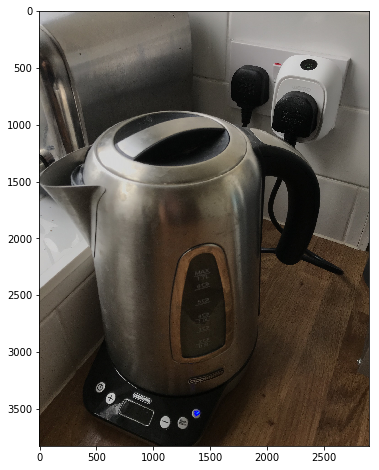

In [11]:
TAG = 'kettle'
FILE_KETTLE = 'kettle.jpg'
img = plt.imread(FILE_KETTLE)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

In [12]:
URL_TEACH = "http://{}/tagbox/teach?tag={}&id={}".format(ENDPOINT, TAG, FILE_KETTLE)

In [13]:
URL_TEACH

'http://localhost:8080/tagbox/teach?tag=kettle&id=kettle.jpg'

In [14]:
%%time
files = {
    'file': (FILE_KETTLE, open(FILE_KETTLE, 'rb')),
}

response = requests.post(URL_TEACH, files=files).json()

CPU times: user 4.33 ms, sys: 2.7 ms, total: 7.04 ms
Wall time: 1.74 s


In [15]:
print_json(response)

{'success': True}


Let's check it is tagged

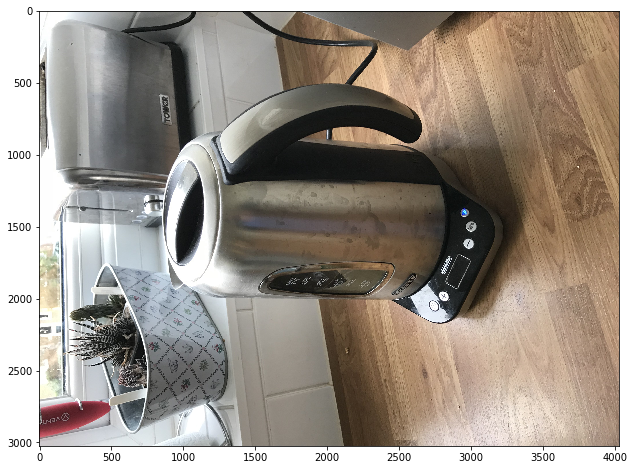

In [16]:
FILE_KETTLE_2 = 'kettle_2.jpg'
img = plt.imread(FILE_KETTLE_2)
fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.imshow(img);

In [17]:
%%time
files = {
    'file': (FILE_KETTLE_2, open(FILE_KETTLE_2, 'rb')),
}
response = requests.post(URL_CHECK, files=files).json()

CPU times: user 3.89 ms, sys: 3.17 ms, total: 7.06 ms
Wall time: 1.76 s


In [18]:
print_json(response)

{'custom_tags': [{'confidence': 0.6132877116923328,
                  'id': 'kettle.jpg',
                  'tag': 'kettle'}],
 'success': True,
 'tags': [{'confidence': 0.6151951551437378, 'tag': 'Wheel'},
          {'confidence': 0.5055519342422485, 'tag': 'Automotive exterior'},
          {'confidence': 0.4698774218559265, 'tag': 'Iron'}]}


It found the kettle with 61% confidence

In [19]:
if response['custom_tags']:
    custom_tags = {tag['tag']:tag['confidence'] for tag in response['custom_tags']}
custom_tags

{'kettle': 0.6132877116923328}

In [20]:
tags.update(custom_tags)
tags

{'Breakfast': 0.7076804637908936,
 'Cuisine': 0.6256734728813171,
 'Dish': 0.9119579792022705,
 'Food': 0.9323090314865112,
 'Lunch': 0.39323535561561584,
 'Meal': 0.9054304957389832,
 'Produce': 0.5702366828918457,
 'kettle': 0.6132877116923328}

## Dev stuff

In [33]:
tags = ['kettle', 'keys']
default_tags = {tag: '0.0' for tag in tags}
default_tags

{'kettle': '0.0', 'keys': '0.0'}

In [35]:
def get_default_tags(tags_list):
    return {tag: '0.0' for tag in tags_list}

{}

In [5]:
bla = {}
if bla:
    print(True)

In [16]:
timer_start = time.perf_counter()

In [17]:
elapsed = time.perf_counter() - timer_start

In [19]:
round(elapsed, ROUNDING_DECIMALS)

9.33

In [23]:
tags = {'a':0, 'b':0}
max(tags.keys(), key=(lambda k: tags[k]))

'a'

In [22]:
if tags:
    print(True)